# Linear Regression Project

# Pedicting the medical insurance costo of a person

   In this project we will build a linear regression model to predict the insurance prima for an individual based on different factors.

   Start with your exploratory data analysis and data transformation if needed.

   Build your baseline model, measure your results and optimize your model.

   Finally, create a pipeline for your final model and put it in you app.py file.




This dataset has 7 columns. We will use the 'charges' column as the target variable because we want to create a model that predicts the cost of the insurance based on different factors.

Columns:
- age: age of primary beneficiary
- sex: insurance contractor gender, female or male
- bmi: Body mass index
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

# Step 0 - Import Library

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
#!pip install seaborn
import seaborn as sns
import seaborn as sb
#!pip install plotly
import plotly.graph_objects as go
#!pip install folium
#!pip install statsmodels
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import plotly.express as px

ModuleNotFoundError: No module named 'pandas'

# Setp 1 - Import and Basic Explored Data

In [ ]:
#step 0 Load dataset
df_raw=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()


In [ ]:
#step 1 Basic exploration
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_raw.sample(10)

,age,sex,bmi,children,smoker,region,charges
818,47,female,26.125,1,yes,northeast,23401.30575
1152,43,female,32.560,3,yes,southeast,40941.28540
681,19,male,20.300,0,no,southwest,1242.26000
110,54,male,33.630,1,no,northwest,10825.25370
145,29,female,38.830,3,no,southeast,5138.25670
1058,24,female,39.490,0,no,southeast,2480.97910
763,27,male,26.030,0,no,northeast,3070.80870
1023,18,male,23.320,1,no,southeast,1711.02680
1225,33,female,39.820,1,no,southeast,4795.65680
949,25,male,29.700,3,yes,southwest,19933.45800


In [ ]:
df_raw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
len(df_raw)

1338

In [ ]:
df_raw.shape

(1338, 7)

# Step 2 make the transformation

para que el dataset se adecue para pasarlo a una matriz de solo números.
tenemos 3 variables categóricas
En un dataset heterogeno las var categoricas van a ser las estratas.

Variables numéricas

Chequear si variable dependiente está balanceada o no.

In [ ]:
df_raw.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df_raw.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df_raw.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
### para ver todo junto
"""print('Data distribution analisys')
for v in variables:
    df_raw = df_raw.sort_values(by=[v])
    df_raw[v].value_counts().plot(kind = 'bar')
plt.title(v)
plt.show()"""

"print('Data distribution analisys')\nfor v in variables:\n    df_raw = df_raw.sort_values(by=[v])\n    df_raw[v].value_counts().plot(kind = 'bar')\nplt.title(v)\nplt.show()"

In [ ]:
df_raw.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df_raw[df_raw.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df_raw.duplicated().any()

True

<AxesSubplot:>

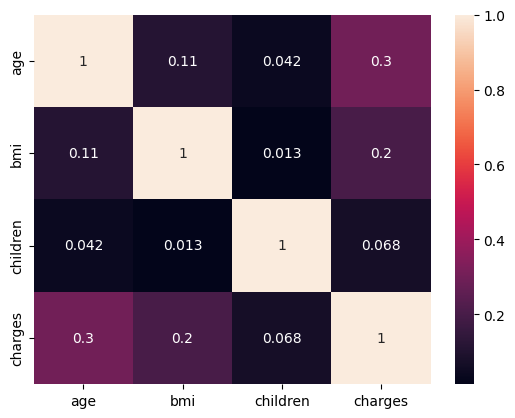

In [ ]:
sb.heatmap(df_raw.corr(), annot=True)

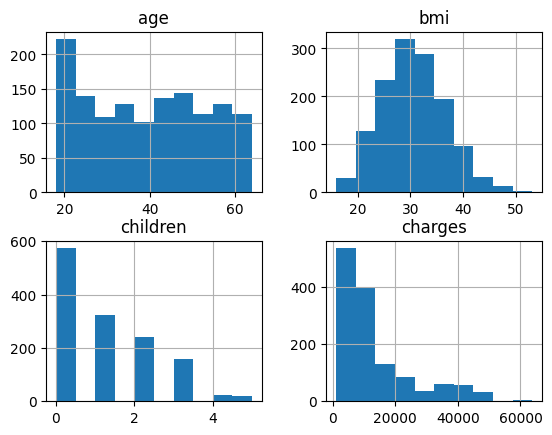

In [ ]:
df_raw.hist()

plt.show()

# analizamos variable target

<AxesSubplot:>

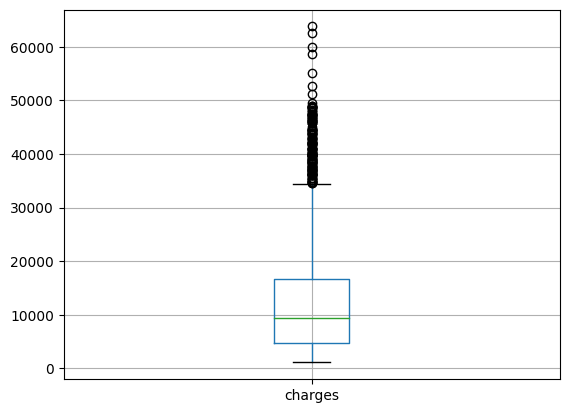

In [ ]:
df_raw.boxplot(column='charges')

<AxesSubplot:>

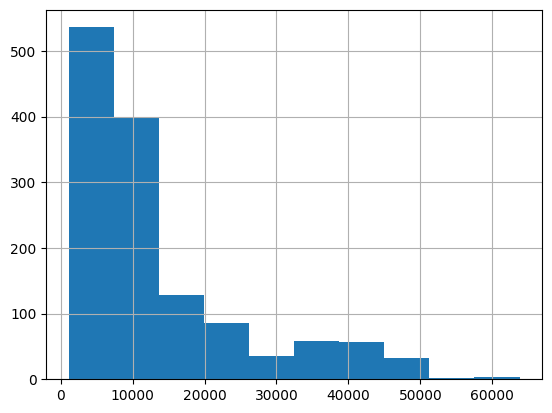

In [ ]:

df_raw['charges'].hist()

In [ ]:
df_raw['charges_log'] = np.log10(df_raw['charges']+10**(-6))
df_raw

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,4.227499
1,18,male,33.770,1,no,southeast,1725.55230,3.236928
2,28,male,33.000,3,no,southeast,4449.46200,3.648308
3,33,male,22.705,0,no,northwest,21984.47061,4.342116
4,32,male,28.880,0,no,northwest,3866.85520,3.587358
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,4.025328
1334,18,female,31.920,0,no,northeast,2205.98080,3.343602
1335,18,female,36.850,0,no,southeast,1629.83350,3.212143
1336,21,female,25.800,0,no,southwest,2007.94500,3.302752


<AxesSubplot:>

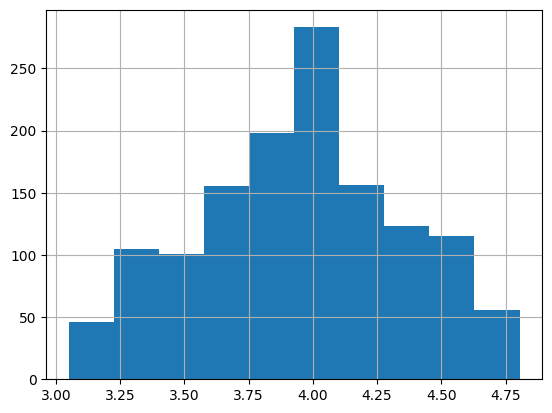

In [ ]:
df_raw['charges_log'].hist()
# Para sacar la métrica real del error tendríamos que realizar la inversa de la transformación.

In [ ]:
fig = px.box(df_raw, y="charges")
fig.show()

In [ ]:
# charges según sexo
fig = px.box(df_raw, x='sex', y='charges')
fig.show()

In [ ]:
# charges según region
fig = px.box(df_raw, x="region", y="charges")
fig.show()

In [ ]:
# charges según fumadores
fig = px.box(df_raw, x="smoker", y="charges")
fig.show()

In [ ]:
# charges según si tienen hijos
fig = px.box(df_raw, x="children", y="charges")
fig.show()

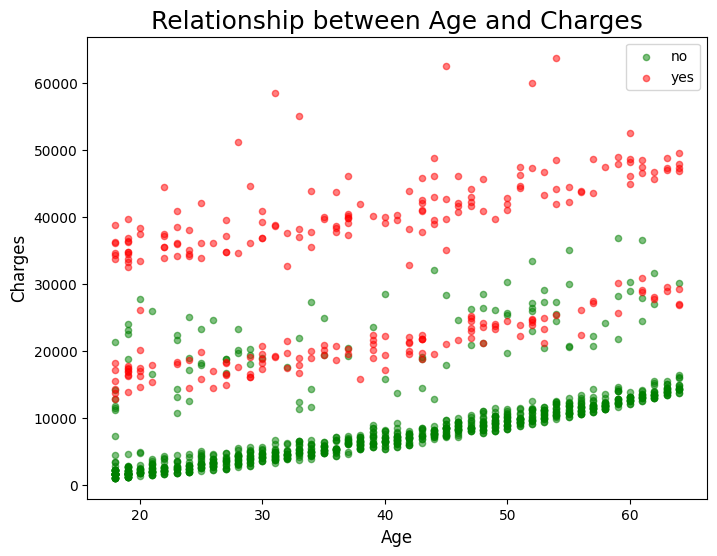

In [ ]:
# scatter plot charges según edad, identificando con colores si fuma o no fuma
ax1 = df_raw[df_raw['smoker'] == 'no'].plot(kind='scatter', x='age', y='charges', color='green', alpha=0.5, figsize=(8,6))
df_raw[df_raw['smoker'] == 'yes'].plot(kind='scatter', x='age', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between Age and Charges', size=18)
plt.xlabel('Age', size=12)
plt.ylabel('Charges', size=12);


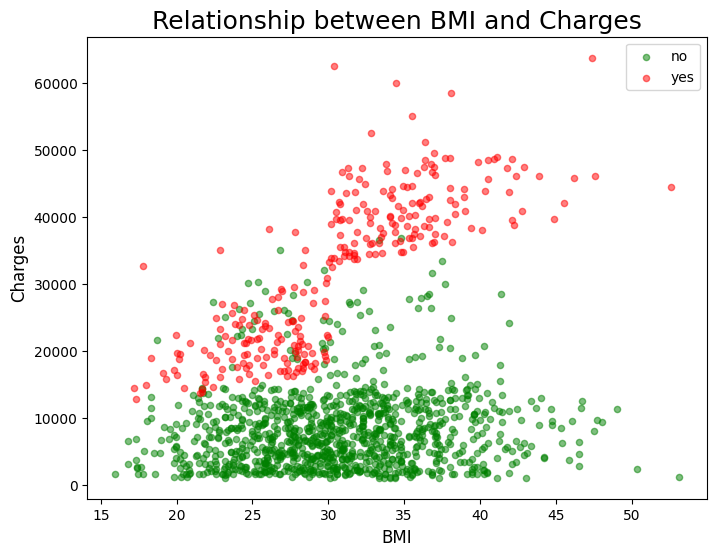

In [ ]:
# scatter plot charges según BMI, identificando con colores si fuma o no fuma
ax1 = df_raw[df_raw['smoker'] == 'no'].plot(kind='scatter', x='bmi', y='charges', color='green', alpha=0.5, figsize=(8,6))
df_raw[df_raw['smoker'] == 'yes'].plot(kind='scatter', x='bmi', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between BMI and Charges', size=18)
plt.xlabel('BMI', size=12)
plt.ylabel('Charges', size=12);

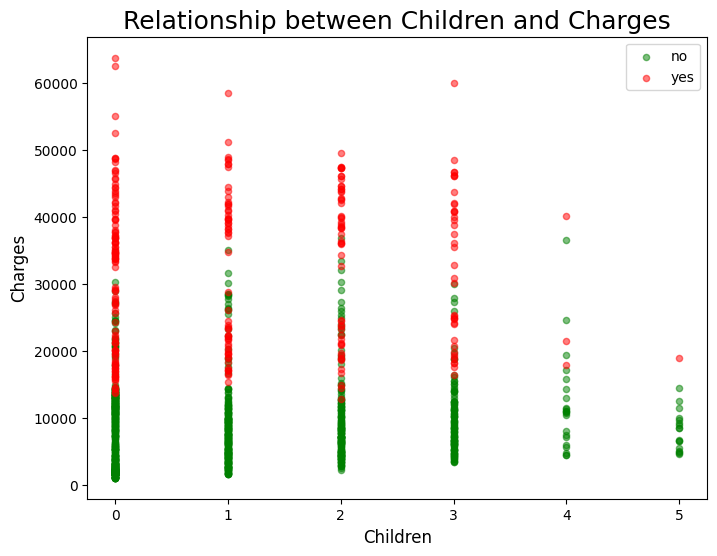

In [ ]:
# scatter plot charges según children, identificando con colores si fuma o no fuma
ax1 = df_raw[df_raw['smoker'] == 'no'].plot(kind='scatter', x='children', y='charges', color='green', alpha=0.5, figsize=(8,6))
df_raw[df_raw['smoker'] == 'yes'].plot(kind='scatter', x='children', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between Children and Charges', size=18)
plt.xlabel('Children', size=12)
plt.ylabel('Charges', size=12);

Los fumadores siempre pagan más.
Parecería haber tres "tipos" de seguros.
No parecería existir relación con la región.

In [ ]:
X=df_raw.drop(columns=['charges','charges_log'])
y=df_raw['charges']

In [ ]:
#encoding codifcar el valor de las var categóricas
#rules: columnas de la clase x = categorías -1

df_raw['sex']=df_raw['sex'].apply(lambda x:1 if x=='female'  else 0)
df_raw['smoker']=df_raw['smoker'].apply(lambda x:1 if x=="yes" else 0)
df_raw['region_sw']=df_raw['region'].apply(lambda x:1 if x=="southwest" else 0)
df_raw['region_nw']=df_raw['region'].apply(lambda x:1 if x=="northwest" else 0)
df_raw['region_ne']=df_raw['region'].apply(lambda x:1 if x=="northeast" else 0)
df_raw=df_raw.drop(['sex','smoker','region'],axis=1)
df_interim=df_raw.copy()







<AxesSubplot:>

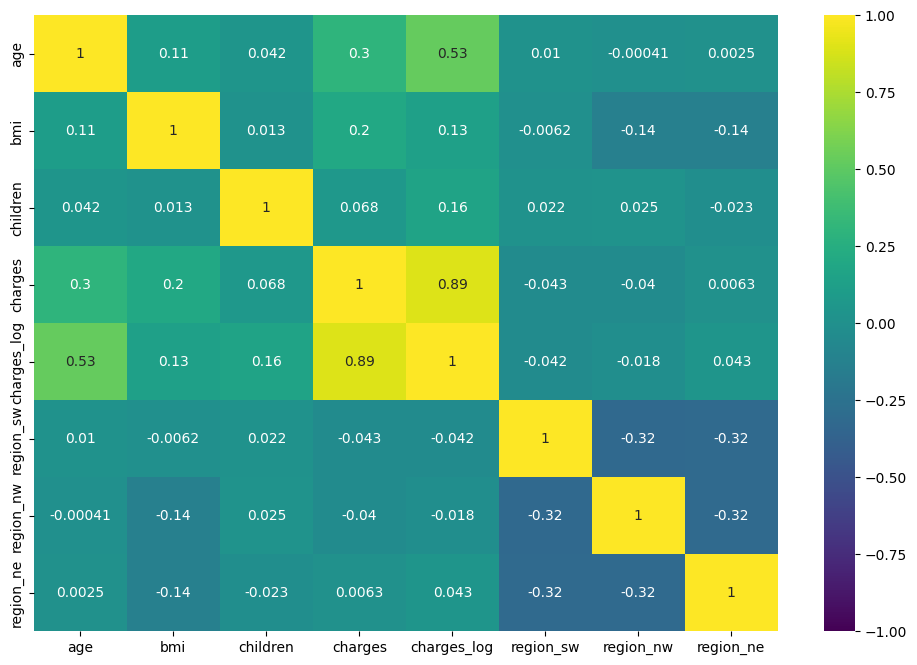

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)

In [ ]:
df_interim.sample(10)

,age,bmi,children,charges,charges_log,region_sw,region_nw,region_ne
1035,54,23.000,3,12094.47800,4.082587,1,0,0
347,46,33.345,1,8334.45755,3.920877,0,0,1
223,19,34.800,0,34779.61500,4.541325,1,0,0
100,41,31.600,0,6186.12700,3.791419,1,0,0
761,23,35.200,1,2416.95500,3.383269,1,0,0
1152,43,32.560,3,40941.28540,4.612161,0,0,0
869,25,24.300,3,4391.65200,3.642628,1,0,0
88,46,27.740,0,8026.66660,3.904535,0,1,0
1027,23,18.715,0,21595.38229,4.334361,0,1,0
1028,54,31.600,0,9850.43200,3.993455,1,0,0


## PASO 4

Probando variable charges sin transformación:

In [ ]:
X=df_raw.drop(columns=['charges','charges_log'])
y=df_raw['charges']

In [ ]:
X_train,X_test_aux,y_train, y_test_aux=train_test_split(X,y,test_size=0.3,random_state=412)
print(X_train.shape,y_train.shape)
print(X_test_aux.shape,y_test_aux.shape)

(936, 6) (936,)
(402, 6) (402,)


In [ ]:
X_val,X_test,y_val,y_test=train_test_split(X_test_aux,y_test_aux,test_size=0.5,random_state=142)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(936, 6) (936,)
(201, 6) (201,)
(201, 6) (201,)


In [ ]:
### modelo regresión lineal
X = df_raw.drop(['charges'], axis=1)
y = df_raw['charges']

In [ ]:
X

NameError: name 'X' is not defined

In [ ]:
# separo en muestras de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# estimo modelo
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# veo los coeficientes
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -104129.21608677269
Coefficients: 
 [ -207.66897718   154.5467498   -792.49079598 30939.5279779
  -499.04994091  -919.54002007 -1234.99122266]


In [ ]:
X_train

,age,bmi,children,charges_log,region_sw,region_nw,region_ne
560,46,19.950,2,3.963497,0,1,0
1285,47,24.320,0,3.931187,0,0,1
1142,52,24.860,0,4.433258,0,0,0
969,39,34.320,5,3.934338,0,0,0
486,54,21.470,3,4.096053,0,1,0
...,...,...,...,...,...,...,...
1095,18,31.350,4,3.659078,0,0,1
1130,39,23.870,5,3.933604,0,0,0
1294,58,25.175,0,4.076681,0,0,1
860,37,47.600,2,4.663828,1,0,0


# Predigo target (charges) según datos de ejemplo

In [ ]:
# ejemplo
t = 0
edad = 33
sex = 1
bmi = 22
children = 0
smoker = 1
region = 3





In [ ]:
print('Predicted prima : \n', regr.predict([[t,edad,sex,bmi,children,smoker,region]]))

Predicted prima : 
 [576223.43768637]


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print("intercept: ",modelo.intercept_)
print("variables: ",X_train.columns)
print("coeficiente: ",modelo.coef_)

intercept:  -104129.21608677269
variables:  Index(['age', 'bmi', 'children', 'charges_log', 'region_sw', 'region_nw',
       'region_ne'],
      dtype='object')
coeficiente:  [ -207.66897718   154.5467498   -792.49079598 30939.5279779
  -499.04994091  -919.54002007 -1234.99122266]


In [ ]:
Xint = sm.add_constant(X_train)
modelo2 = sm.OLS(y_train, Xint)
results = modelo2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     869.3
Date:                Mon, 25 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:29:17   Log-Likelihood:                -10550.
No. Observations:                1070   AIC:                         2.112e+04
Df Residuals:                    1062   BIC:                         2.116e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.041e+05   1636.268    -63.638      0.000   -1.07e+05   -1.01e+05
age          -207.6690     11.799    -17.601      0.000    -230.820    -184.518
bmi           154.5467     24.720      6.252      0.000     106.041     203.053
children     -792.4908    118.710     -6.676      0.000   -1025.423    -559.558
charges_log  3.094e+04    425.870     72.650      0.000    3.01e+04    3.18e+04
region_sw    -499.0499    402.593     -1.240      0.215   -1289.018     290.918
region_nw    -919.5400    411.657     -2.234      0.026   -1727.293    -111.787
region_ne   -1234.9912    409.382     -3.017      0.003   -2038.281    -431.701
==============================================================================
Omnibus:                      288.916   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              817.053
Skew:                           1.365   Prob(JB):                    3.79e-178
Kurtosis:                       6.297   Cond. No.                         609.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_pred = modelo.predict(X_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print('RMSE', metrics.mean_squared_error(y_test, y_pred,squared=False))

MAE: 3275.0454137863353
MSE: 20208057.60041646
RMSE: 4495.337317756751


In [ ]:
Xint = sm.add_constant(X_train)
modelo3 = sm.OLS(y_train, X_train)
results = modelo3.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.680
Model:                            OLS   Adj. R-squared (uncentered):              0.678
Method:                 Least Squares   F-statistic:                              322.5
Date:                Mon, 25 Jul 2022   Prob (F-statistic):                   9.12e-258
Time:                        00:29:17   Log-Likelihood:                         -11390.
No. Observations:                1070   AIC:                                  2.279e+04
Df Residuals:                    1063   BIC:                                  2.283e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age            -9.0873     24.952     -0.364      0.716     -58.048      39.873
bmi          -454.1231     49.987     -9.085      0.000    -552.208    -356.038
children     -273.3592    259.705     -1.053      0.293    -782.952     236.234
charges_log  8404.9361    518.823     16.200      0.000    7386.902    9422.970
region_sw   -5847.2131    863.402     -6.772      0.000   -7541.379   -4153.047
region_nw   -6594.1485    881.294     -7.482      0.000   -8323.423   -4864.874
region_ne   -6312.7013    880.523     -7.169      0.000   -8040.462   -4584.941
==============================================================================
Omnibus:                      328.815   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              790.771
Skew:                           1.666   Prob(JB):                    1.93e-172
Kurtosis:                       5.577   Cond. No.                         205.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
modelo4 = LinearRegression(fit_intercept=False)
modelo4.fit(X_train, y_train)
print("intercept: ",modelo4.intercept_)
print("variables: ",X_train.columns)
print("coeficiente: ",modelo4.coef_)

intercept:  0.0
variables:  Index(['age', 'bmi', 'children', 'charges_log', 'region_sw', 'region_nw',
       'region_ne'],
      dtype='object')
coeficiente:  [   -9.08726779  -454.12306401  -273.35915951  8404.93611939
 -5847.21309785 -6594.14853572 -6312.70126609]


In [ ]:
print("Modelo con constante")
y_pred = modelo.predict(X_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Modelo sin constante")
y_pred_sin_int = modelo4.predict(X_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_sin_int))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_sin_int))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_sin_int)))

Modelo con constante
MAE: 3275.0454137863353
MSE: 20208057.60041646
RMSE: 4495.337317756751
Modelo sin constante
MAE: 7815.236564429948
MSE: 108026010.92623053
RMSE: 10393.556221343613


In [ ]:
poly_feature = PolynomialFeatures(degree=2)
x_poly_train = poly_feature.fit_transform(X_train)
x_poly_test = poly_feature.fit_transform(X_test)
modelo5 = modelo.fit(x_poly_train, y_train)

In [ ]:
y_pred_poly = modelo5.predict(x_poly_test)
print("Modelo de segundo grado")
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_poly))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_poly))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

Modelo de segundo grado
MAE: 763.0788581942868
MSE: 1165067.0068447213
RMSE: 1079.3826971212395


* Realizado en otra clase

In [ ]:
#step 3 (3.1,3.2,3.3)  y luego EDA con dataset de entrenamiento
#evitar data leakage
#3.1 sacar el dataset de prueba y trabajar con el de aprendizaje

"""X=df_interim[['age','bmi','children','sex','smoker','region']]
y=df_interim['charges']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40)"""




"X=df_interim[['age','bmi','children','sex','smoker','region']]\ny=df_interim['charges']\n\nX_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40)"

In [ ]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
#step 3.2 estadísticas básicas 
X_train.describe()

,age,bmi,children,charges_log,region_sw,region_nw,region_ne
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.357009,30.560397,1.107477,3.957866,0.246729,0.239252,0.249533
std,14.073960,6.043386,1.215983,0.395903,0.431309,0.426827,0.432945
min,18.000000,15.960000,0.000000,3.049944,0.000000,0.000000,0.000000
25%,27.000000,26.205000,0.000000,3.689989,0.000000,0.000000,0.000000
50%,39.500000,30.210000,1.000000,3.981159,0.000000,0.000000,0.000000
75%,51.000000,34.496250,2.000000,4.223926,0.000000,0.000000,0.000000
max,64.000000,53.130000,5.000000,4.796525,1.000000,1.000000,1.000000


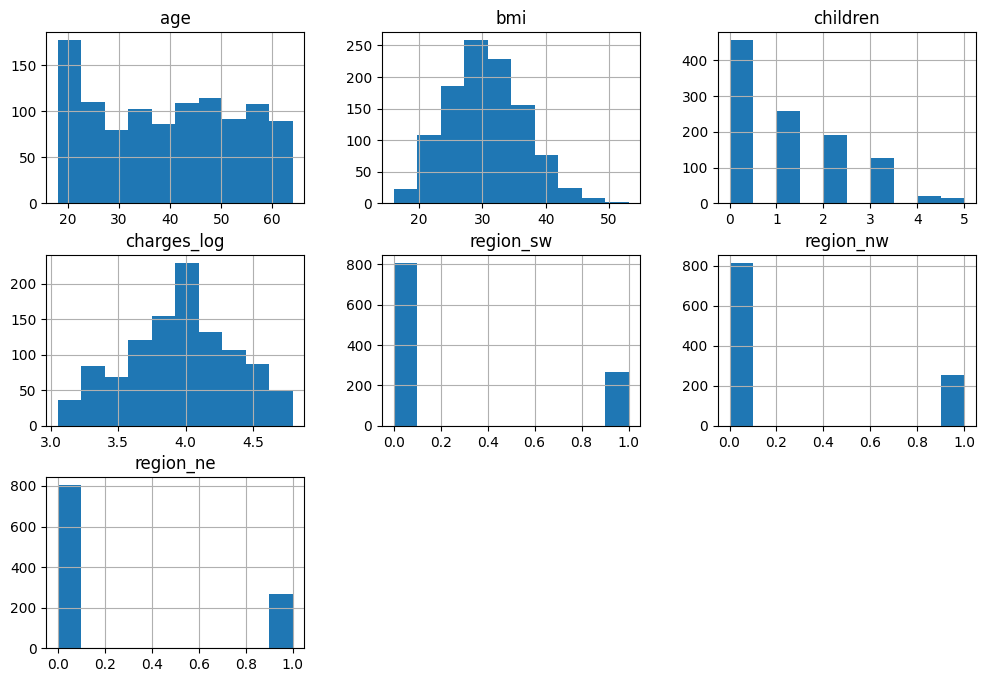

In [ ]:
#step 3.3 análisis univariado
X_train.hist(figsize=(12,8))
plt.show()

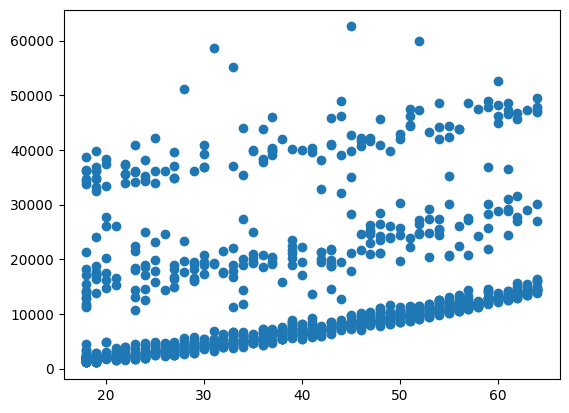

In [ ]:
# step 3.4 Análisis bi variado
# encontramos 3 estratos que enmascaran la regresión con la edad.
plt.scatter(x=X_train['age'],y=y_train)
plt.show()

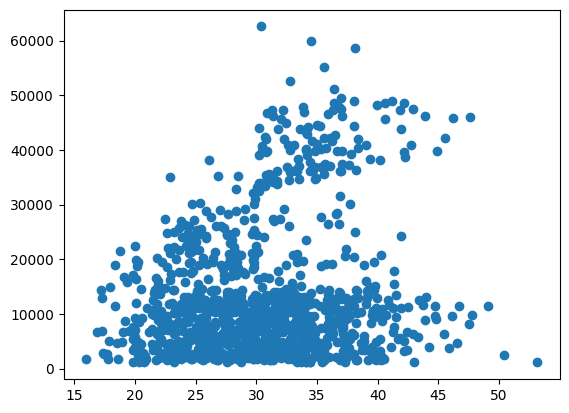

In [ ]:
 

plt.scatter(x=X_train['bmi'],y=y_train)
plt.show()

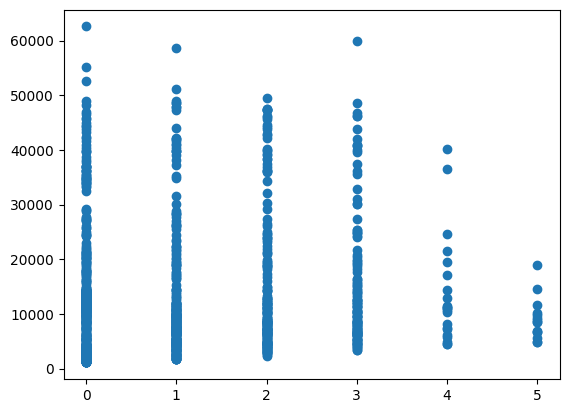

In [ ]:
plt.scatter(x=X_train['children'],y=y_train)
plt.show()

# Ver que variables están correlacionadas 
(se da entre var continuas)
ver correlaciones

In [ ]:

X_train.corr()


,age,bmi,children,charges_log,region_sw,region_nw,region_ne
age,1.000000,0.118274,0.060999,0.510779,0.022307,0.013019,-0.019700
bmi,0.118274,1.000000,-0.005040,0.135163,0.010248,-0.112666,-0.151206
children,0.060999,-0.005040,1.000000,0.164964,-0.002450,0.033319,-0.004791
charges_log,0.510779,0.135163,0.164964,1.000000,-0.037107,-0.006538,0.033326
region_sw,0.022307,0.010248,-0.002450,-0.037107,1.000000,-0.320954,-0.330014
region_nw,0.013019,-0.112666,0.033319,-0.006538,-0.320954,1.000000,-0.323374
region_ne,-0.019700,-0.151206,-0.004791,0.033326,-0.330014,-0.323374,1.000000


No encontramos correlación mayor a 0.8

In [ ]:
X_train.corr().style.background_gradient(cmap='Blues')

,age,bmi,children,charges_log,region_sw,region_nw,region_ne
age,1.000000,0.118274,0.060999,0.510779,0.022307,0.013019,-0.019700
bmi,0.118274,1.000000,-0.005040,0.135163,0.010248,-0.112666,-0.151206
children,0.060999,-0.005040,1.000000,0.164964,-0.002450,0.033319,-0.004791
charges_log,0.510779,0.135163,0.164964,1.000000,-0.037107,-0.006538,0.033326
region_sw,0.022307,0.010248,-0.002450,-0.037107,1.000000,-0.320954,-0.330014
region_nw,0.013019,-0.112666,0.033319,-0.006538,-0.320954,1.000000,-0.323374
region_ne,-0.019700,-0.151206,-0.004791,0.033326,-0.330014,-0.323374,1.000000
